In [1]:
%matplotlib inline
%pylab inline

import os
os.chdir('/home/pbreen/Desktop/word_analysis_socialmed')

from gensim.models import Word2Vec
import pandas as pd
import numpy as np

from sm_w2v.utils import (
    twts,
    len_iterable,
    cleaned_sentences_twt,
    coord_twts,
    
    )
from sm_w2v.plot_utils import (
    make_heatmap_w2vrelated,
    make_histogram,
    scikit_pca,
    plot_map,
    make_tsne_plot
    )

Populating the interactive namespace from numpy and matplotlib


# preliminary analysis:

In [2]:
# important keys are 'text', 'created_at', 'coordinates'
print("These are the Keys:")
for twt in twts:
    print(twt.keys())
    break

# more than 2 million tweets or >8 Gigs
print("\n Number of english tweets:")
print(len_iterable(cleaned_sentences_twt))

These are the Keys:
dict_keys(['contributors', 'text', 'source', 'entities', 'in_reply_to_user_id_str', 'timestamp_ms', 'place', 'truncated', 'in_reply_to_screen_name', 'favorited', 'in_reply_to_user_id', 'user', 'created_at', 'geo', 'filter_level', 'id', 'lang', 'coordinates', 'in_reply_to_status_id_str', 'id_str', 'retweet_count', 'retweeted', 'is_quote_status', 'weeknum', 'favorite_count', 'in_reply_to_status_id'])

 Number of english tweets:
4713864


In [3]:
# Examples
print("example text:")
for twt in twts:
    print(twt['text'])
    break

print("example sentence:")
for sentence in cleaned_sentences_twt:
    print(sentence)
    break

example text:
Prep up bye
example sentence:
['walgreens', 'flu', 'shot', 'washing', 'hands', 'frequently', 'getting', 'proper', 'amt', 'rest', '', '\n']


In [4]:
# Now load model
model = Word2Vec.load("sm_w2v/models_freq_tables/twt.model")

# print word to vec results over all tweets for words related to 'hiv'
rel_wds = model.most_similar(positive=['hiv'], topn=10)
print('\n most similar word(s) to hiv (according to word2vec):')
print(rel_wds)


 most similar word(s) to hiv (according to word2vec):
[('hivaids', 0.8635327219963074), ('hiv…', 0.654762864112854), ('aidshiv', 0.6339969038963318), ('hivpositive', 0.5689427256584167), ('dengue', 0.5370256900787354), ('malaria', 0.5285170078277588), ('hepatitis', 0.5254543423652649), ('syphilis', 0.5253939628601074), ('chlamydia', 0.5189664363861084), ('aids', 0.5122970342636108)]



 Number of tweets with coordinates:
24445


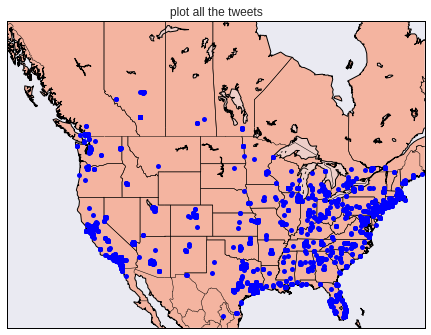

In [5]:
# plot all the tweets
print("\n Number of tweets with coordinates:")
coord_twts = list(coord_twts)
print(len(coord_twts))
plot_map(coord_twts, title='plot all the tweets')

# Time series plotting:

In [6]:
# import datetime
# str_dates = [str(item) for item in count_word_week.index]
# print(str_dates)
# for sdate in str_dates:
#     print(datetime.datetime.strptime(sdate, "%Y%W"))



,hivaids,hiv…,aidshiv,hivpositive,dengue,malaria,hepatitis,syphilis,chlamydia,aids
date (YYYYWW),,,,,,,,,,
201546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
201547,0.019292,0.000805,0.000859,0.013820,0.020950,0.061416,0.025983,0.010368,0.110178,0.052759
201548,0.031083,0.000738,0.000542,0.012873,0.019817,0.114034,0.036784,0.013291,0.020039,0.084801
201549,0.094602,0.001533,0.001297,0.018633,0.018336,0.025972,0.016783,0.008879,0.009460,0.358355
201550,0.025609,0.000722,0.000850,0.004642,0.052960,0.069013,0.023837,0.008905,0.012359,0.065778
201551,0.019625,0.001124,0.001114,0.008743,0.020075,0.055998,0.048805,0.014318,0.014248,0.061840
201552,0.033927,0.002141,0.000656,0.002899,0.012615,0.037176,0.045566,0.009192,0.009512,0.060483
201601,0.023609,0.000410,0.001383,0.003324,0.023798,0.052653,0.067867,0.018021,0.026739,0.049329
201602,0.030361,0.000650,0.000871,0.001980,0.021883,0.064968,0.035070,0.011936,0.021146,0.059821


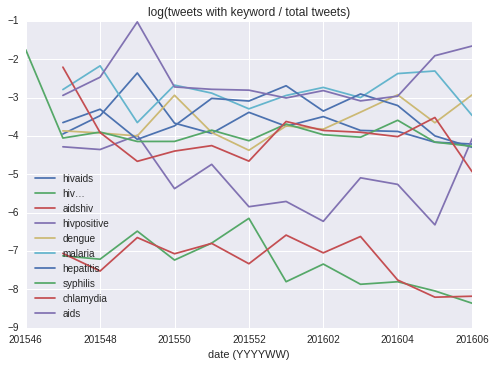

In [7]:
# display and plot
count_word_week = pd.read_csv("sm_w2v/models_freq_tables/twt_hiv_wdfreq.csv",
                              index_col=0,
                             )
str_dates = [str(item) for item in count_word_week.index]
count_word_week.index = str_dates
count_word_week.index.name = "date (YYYYWW)"
display(count_word_week)
# add min and take log
count_word_week = count_word_week.apply(lambda x: np.log(x + np.min(x)))
count_word_week.plot(title="log(tweets with keyword / total tweets)")

# clustering of words, using word2vec distance measure (cosine similarity)
(using word2vec vectors)

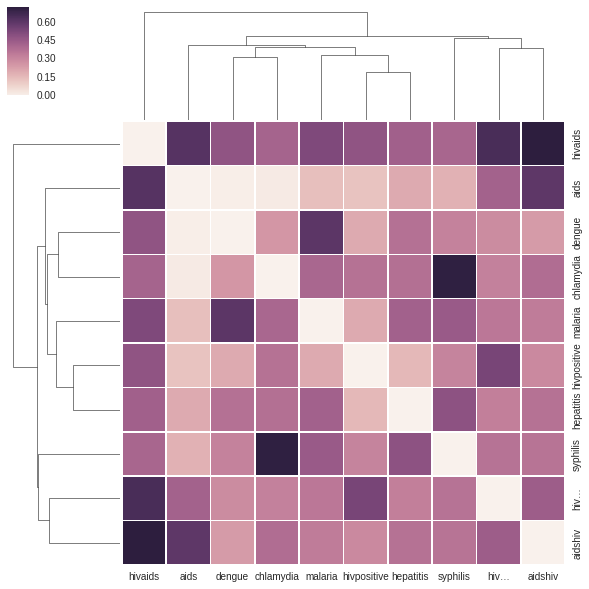

In [8]:
# make heatmap (distance between top 10 word-vectors related to 'hiv'
# over all tweets)
make_heatmap_w2vrelated(model, rel_wds=rel_wds)

# Do clustering of word-vecs

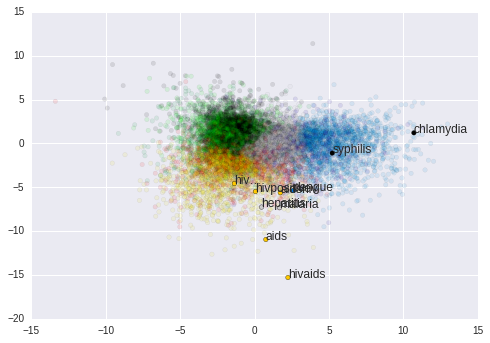

explained variance ratio: 
[ 0.05126386  0.0353181 ]


In [9]:
# PCA (visualization of all words in 2D)
explained_variances = scikit_pca(model, rel_wds, cluster="kmeans")
print("explained variance ratio: ")
print(explained_variances)

# Do t-SNE on word-vecs

In [11]:
make_tsne_plot(model, rel_wds)

MemoryError: 